In [18]:
#1
import pandas as pd
import numpy as np


file_path = r"C:\Users\Pily\Downloads\11_biz_merged_clean.parquet"

# load into DataFrame
df = pd.read_parquet(file_path, engine="pyarrow")  # or engine="fastparquet"

# quick check
print(df.shape)   # rows, columns
print(df.columns) # column names
display(df.head())  

(36261, 82)
Index(['business_id', 'city', 'state', 'latitude', 'longitude', 'review_count',
       'is_open', 'review_count_log1p', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_BikeParking',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi',
       'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating',
       'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed',
       'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire',
       'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups',
       'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking',
       'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours',
       'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)',
       'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch',
       'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian',
    

,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,city_Sparks,city_Tampa,city_Tucson,city_Wilmington,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0.0,0.0,0.0,0.0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.450000,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0.0,0.0,0.0,0.0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.000000,0.00
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,True,2.397895,False,True,...,0.0,0.0,0.0,0.0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.200000,0.00
3,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,27.955269,-82.456320,10.0,True,2.397895,<NA>,<NA>,...,0.0,0.0,0.0,0.0,8,4.250000,2019-01-16 18:22:34,2022-01-03 01:18:29,91.875000,0.00
4,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,39.637133,-86.127217,28.0,True,3.367296,<NA>,True,...,0.0,0.0,0.0,0.0,12,2.250000,2019-01-01 19:58:17,2021-04-22 13:58:42,97.833336,0.00


In [19]:
if "avg_stars_2019" not in df.columns:
    raise ValueError("Expected an 'avg_stars_2019' column to create the label.")
y = (df["avg_stars_2019"] >= 4.0).astype(int)

In [20]:
#2
numeric_cols_all = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(f"Total numeric columns in df: {len(numeric_cols_all)}")
print("Some numeric columns:", numeric_cols_all[:100])

# Candidate numeric features you want to prioritize
candidate_num = [
    "review_count", "latitude", "longitude", "price_range",
    "weekly_open_hours", "days_open", "weekend_hours"
]

# Keep only the candidate numerics that actually exist
num_cols = [c for c in candidate_num if c in df.columns]

# Add log1p(review_count) if review_count exists
if "review_count" in df.columns:
    df["review_count_log1p"] = np.log1p(df["review_count"])
    num_cols.append("review_count_log1p")

print(f"Candidate numeric features found: {len(num_cols)}")
print("Numeric features in use:", num_cols)

Total numeric columns in df: 34
Some numeric columns: ['latitude', 'longitude', 'review_count', 'review_count_log1p', 'attr_RestaurantsPriceRange2', 'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours', 'city_Boise', 'city_Brandon', 'city_Cherry Hill', 'city_Clearwater', 'city_Franklin', 'city_Indianapolis', 'city_Largo', 'city_Meridian', 'city_Metairie', 'city_Nashville', 'city_New Orleans', 'city_Other', 'city_Philadelphia', 'city_Reno', 'city_Saint Louis', 'city_Saint Petersburg', 'city_Santa Barbara', 'city_Sparks', 'city_Tampa', 'city_Tucson', 'city_Wilmington', 'rev_count_2019', 'avg_stars_2019', 'rl_word_mean', 'rl_share_short24']
Candidate numeric features found: 6
Numeric features in use: ['review_count', 'latitude', 'longitude', 'days_open', 'weekend_hours', 'review_count_log1p']


In [21]:
# 3 :Add log1p(review_count) if review_count exists
if "review_count" in df.columns:
    df["review_count_log1p"] = np.log1p(df["review_count"])
    num_cols.append("review_count_log1p")

# Binary flags (0/1) — include if present
candidate_bin = [
    "RestaurantsReservations","OutdoorSeating","BusinessAcceptsCreditCards","BikeParking",
    "GoodForKids","Delivery","TakeOut","WheelchairAccessible","HasTV","DogsAllowed"
]
bin_cols = [c for c in candidate_bin if c in df.columns]

# Categorical columns
cat_cols = []
for c in ["Alcohol","WiFi","state","city"]:
    if c in df.columns:
        cat_cols.append(c)

# Optional: explode top-N cuisine/category tokens from a 'categories' column (common in Yelp data)
# Assumes comma-separated tokens like "Mexican, Bars, Seafood"
TOP_N_CUISINES = 30
topN_cuisines = []
if "categories" in df.columns:
    # get token counts
    s = (
        df["categories"]
        .dropna()
        .astype(str)
        .str.split(",")
        .explode()
        .str.strip()
        .str.lower()
    )
    # pick top-N (skip super-generic tags if you know them)
    topN_cuisines = s.value_counts().head(TOP_N_CUISINES).index.tolist()

In [22]:
 # 4: create one-hot columns for those cuisines
    # (this keeps everything inside the dataframe so ColumnTransformer can reference them)
for token in topN_cuisines:
        colname = f"cat__{token.replace(' ', '_')}"
        df[colname] = df["categories"].fillna("").str.lower().str.contains(rf"\b{token}\b").astype(int)
    # treat these as binary flags (faster than OHE on an exploding column)
bin_cols.extend([f"cat__{t.replace(' ', '_')}" for t in topN_cuisines])

# Optional: restrict city to Top-K and collapse others to 'Other'
TOP_K_CITIES = 40
if "city" in df.columns:
    top_cities = df["city"].value_counts().head(TOP_K_CITIES).index
    df["city"] = np.where(df["city"].isin(top_cities), df["city"], "Other")

# 9.4) Final feature frame
X = df.drop(columns=["stars"], errors="ignore")  # drop label source
# (Ensure we only pass columns we intended; drop weird types if needed)
keep_cols = set(num_cols + bin_cols + cat_cols)
X = X[[c for c in X.columns if c in keep_cols]].copy()

print(f"Feature columns — numeric({len(num_cols)}), binary({len(bin_cols)}), categorical({len(cat_cols)})")
print("Sample of features:", X.columns[:25])

Feature columns — numeric(7), binary(0), categorical(2)
Sample of features: Index(['city', 'state', 'latitude', 'longitude', 'review_count',
       'review_count_log1p', 'days_open', 'weekend_hours'],
      dtype='object')


In [23]:
# 5: Preprocessing, split, and modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, classification_report, confusion_matrix
)

In [24]:
#6
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# OneHotEncoder: handle sklearn >=1.2 (sparse_output) and older versions (sparse)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)  # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)         # sklearn < 1.2

num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

bin_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value=0))
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="UNK")),
    ("onehot", ohe),
])

pre = ColumnTransformer([
    ("num", num_pipe, [c for c in num_cols if c in X.columns]),
    ("bin", bin_pipe, [c for c in bin_cols if c in X.columns]),
    ("cat", cat_pipe, [c for c in cat_cols if c in X.columns]),
], remainder="drop", sparse_threshold=0.3)

In [26]:
# --- Rebuild pipelines before Step 7 ---

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import scipy.sparse as sp

# you should already have 'pre' (ColumnTransformer) and X, y defined earlier

# CV object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression (elastic-net)
logit = Pipeline([
    ("pre", pre),
    ("clf", LogisticRegression(
        penalty="elasticnet", solver="saga", max_iter=2000,
        class_weight="balanced", n_jobs=-1, random_state=42
    ))
])

# Safe densifier for RF (sparse -> ndarray)
to_dense = FunctionTransformer(
    lambda X: X.toarray() if sp.issparse(X) else np.asarray(X),
    accept_sparse=True
)

# Random Forest pipeline
rf = Pipeline([
    ("pre", pre),
    ("dense", to_dense),
    ("clf", RandomForestClassifier(random_state=42))
])

# (optional) sanity check that train/test exist; if not, split now
try:
    X_tr
except NameError:
    from sklearn.model_selection import train_test_split
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [27]:
from sklearn.model_selection import GridSearchCV

param_logit_small = {"clf__C":[0.1, 1.0], "clf__l1_ratio":[0.35, 0.65]}
gs_logit = GridSearchCV(logit, param_logit_small, scoring="roc_auc", cv=cv, n_jobs=-1, verbose=2)
gs_logit.fit(X_tr, y_tr)

param_rf_small = {
    "clf__n_estimators":[300],
    "clf__max_depth":[12],
    "clf__min_samples_leaf":[1,2],
    "clf__min_samples_split":[2],
    "clf__max_features":["sqrt"],
    "clf__class_weight":[None],
}
gs_rf = GridSearchCV(rf, param_rf_small, scoring="roc_auc", cv=cv, n_jobs=-1, verbose=2)
gs_rf.fit(X_tr, y_tr)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['review_count',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'days_open',
                                                                          'weekend_hours',
                                                                          'review_count_log1p',
                                                                          'review_count_log1p']),
                                                                        ('bin...
                                       ('dense',
                                        FunctionTransformer(accept_sparse=True,
                                                            func=<function <lambda> at 0x0000028A7B5C6B60>)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__class_weight': [None], 'clf__max_depth': [12],
                         'clf__max_features': ['sqrt'],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2],
                         'clf__n_estimators': [300]},
             scoring='roc_auc', verbose=2)

In [28]:
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix)
import numpy as np
import pandas as pd

# make sure searches finished
check_is_fitted(gs_logit); check_is_fitted(gs_rf)

print("LogReg-EN best params:", gs_logit.best_params_,
      "| CV ROC-AUC:", round(gs_logit.best_score_, 4))
print("RandomForest best params:", gs_rf.best_params_,
      "| CV ROC-AUC:", round(gs_rf.best_score_, 4))

def eval_model(estimator, X, y, name, thr=0.50):
    p = estimator.predict_proba(X)[:, 1]
    pred = (p >= thr).astype(int)
    print(f"\n{name} @ {thr:.2f} | "
          f"ROC-AUC {roc_auc_score(y,p):.3f} | PR-AUC {average_precision_score(y,p):.3f} | "
          f"Acc {accuracy_score(y,pred):.3f} | Prec {precision_score(y,pred,zero_division=0):.3f} | "
          f"Rec {recall_score(y,pred,zero_division=0):.3f} | F1 {f1_score(y,pred,zero_division=0):.3f}")
    print("Confusion matrix:\n", confusion_matrix(y, pred))
    print(classification_report(y, pred, digits=3))
    return p

# Evaluate both models at the default 0.50 threshold
p_log = eval_model(gs_logit.best_estimator_, X_te, y_te, "LogReg-EN")
p_rf  = eval_model(gs_rf.best_estimator_,   X_te, y_te, "RandomForest")


LogReg-EN best params: {'clf__C': 0.1, 'clf__l1_ratio': 0.35} | CV ROC-AUC: 0.586
RandomForest best params: {'clf__class_weight': None, 'clf__max_depth': 12, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 300} | CV ROC-AUC: 0.6131

LogReg-EN @ 0.50 | ROC-AUC 0.590 | PR-AUC 0.477 | Acc 0.579 | Prec 0.458 | Rec 0.498 | F1 0.477
Confusion matrix:
 [[2810 1647]
 [1404 1392]]
              precision    recall  f1-score   support

           0      0.667     0.630     0.648      4457
           1      0.458     0.498     0.477      2796

    accuracy                          0.579      7253
   macro avg      0.562     0.564     0.563      7253
weighted avg      0.586     0.579     0.582      7253


RandomForest @ 0.50 | ROC-AUC 0.617 | PR-AUC 0.499 | Acc 0.627 | Prec 0.570 | Rec 0.129 | F1 0.211
Confusion matrix:
 [[4184  273]
 [2434  362]]
              precision    recall  f1-score   support

           0      0.632     0.939     

In [29]:
from sklearn.metrics import f1_score

def best_f1_threshold(y, p, grid=np.linspace(0.10, 0.90, 33)):
    f1s = [f1_score(y, p >= t) for t in grid]
    i = int(np.argmax(f1s))
    return float(grid[i]), float(f1s[i])

t_log, f1_log = best_f1_threshold(y_te, p_log)
t_rf,  f1_rf  = best_f1_threshold(y_te, p_rf)
print(f"\nBest F1 thresholds → LogReg {t_log:.2f} (F1={f1_log:.3f}) | RF {t_rf:.2f} (F1={f1_rf:.3f})")

# Re-evaluate at tuned thresholds
eval_model(gs_logit.best_estimator_, X_te, y_te, "LogReg-EN (tuned)", thr=t_log)
eval_model(gs_rf.best_estimator_,   X_te, y_te, "RandomForest (tuned)", thr=t_rf)



Best F1 thresholds → LogReg 0.40 (F1=0.558) | RF 0.33 (F1=0.562)

LogReg-EN (tuned) @ 0.40 | ROC-AUC 0.590 | PR-AUC 0.477 | Acc 0.417 | Prec 0.394 | Rec 0.955 | F1 0.558
Confusion matrix:
 [[ 357 4100]
 [ 126 2670]]
              precision    recall  f1-score   support

           0      0.739     0.080     0.145      4457
           1      0.394     0.955     0.558      2796

    accuracy                          0.417      7253
   macro avg      0.567     0.518     0.351      7253
weighted avg      0.606     0.417     0.304      7253


RandomForest (tuned) @ 0.33 | ROC-AUC 0.617 | PR-AUC 0.499 | Acc 0.479 | Prec 0.416 | Rec 0.866 | F1 0.562
Confusion matrix:
 [[1050 3407]
 [ 374 2422]]
              precision    recall  f1-score   support

           0      0.737     0.236     0.357      4457
           1      0.416     0.866     0.562      2796

    accuracy                          0.479      7253
   macro avg      0.576     0.551     0.459      7253
weighted avg      0.613     0.

array([0.53494462, 0.57619512, 0.34839816, ..., 0.34809882, 0.36808492,
       0.35750575])

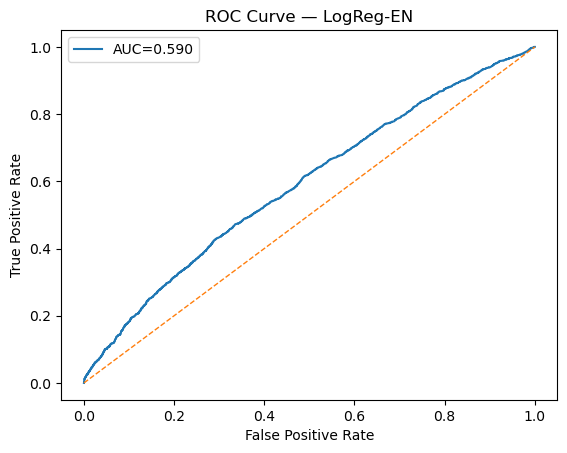

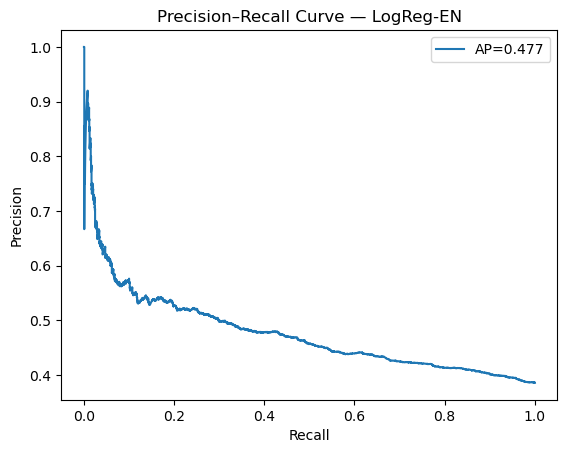

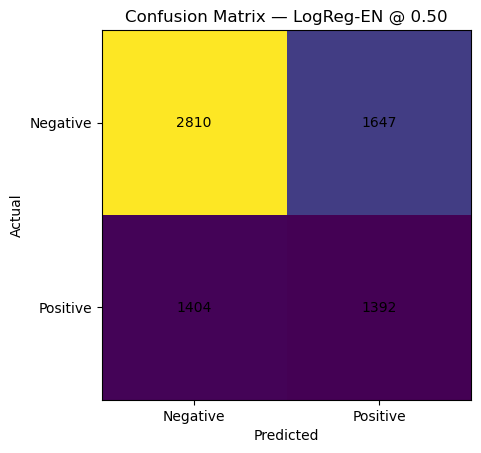

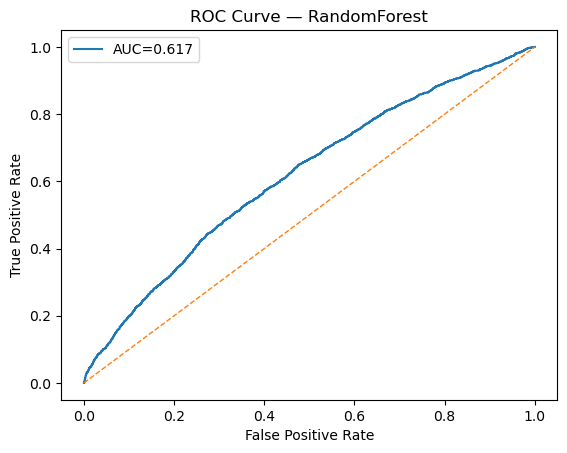

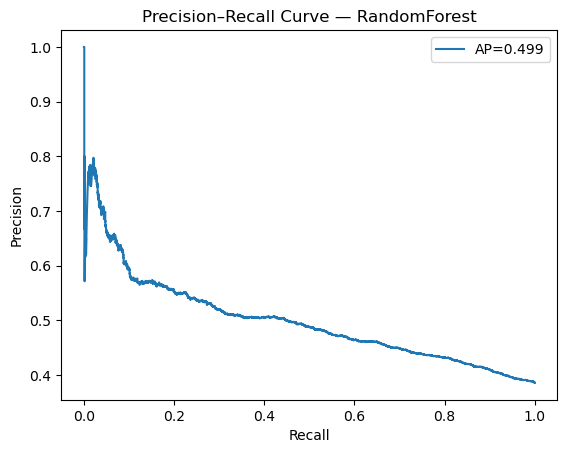

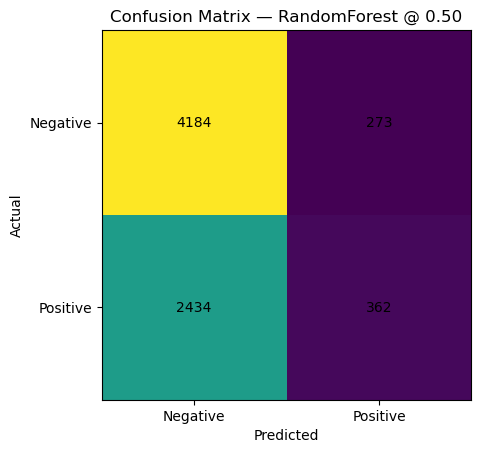

In [30]:
# === Charts for each model: ROC, PR, and Confusion Matrix ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    confusion_matrix
)

# make sure searches are fitted
check_is_fitted(gs_logit)
check_is_fitted(gs_rf)

def plot_roc(estimator, X, y, name):
    prob = estimator.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, prob)
    auc = roc_auc_score(y, prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend()
    plt.show()

def plot_pr(estimator, X, y, name):
    prob = estimator.predict_proba(X)[:, 1]
    prec, rec, _ = precision_recall_curve(y, prob)
    ap = average_precision_score(y, prob)
    plt.figure()
    plt.plot(rec, prec, label=f"AP={ap:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall Curve — {name}")
    plt.legend()
    plt.show()

def plot_cm(estimator, X, y, name, threshold=0.50):
    prob = estimator.predict_proba(X)[:, 1]
    pred = (prob >= threshold).astype(int)
    cm = confusion_matrix(y, pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm)  # default colormap; no custom colors
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, int(val), ha="center", va="center")
    ax.set_xticks([0, 1]); ax.set_xticklabels(["Negative", "Positive"])
    ax.set_yticks([0, 1]); ax.set_yticklabels(["Negative", "Positive"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix — {name} @ {threshold:.2f}")
    plt.show()

# --- Logistic Regression (Elastic Net) ---
plot_roc(gs_logit.best_estimator_, X_te, y_te, "LogReg-EN")
plot_pr(gs_logit.best_estimator_, X_te, y_te, "LogReg-EN")
plot_cm(gs_logit.best_estimator_, X_te, y_te, "LogReg-EN", threshold=0.50)

# --- Random Forest ---
plot_roc(gs_rf.best_estimator_, X_te, y_te, "RandomForest")
plot_pr(gs_rf.best_estimator_, X_te, y_te, "RandomForest")
plot_cm(gs_rf.best_estimator_, X_te, y_te, "RandomForest", threshold=0.50)
